# Purchased Goods and Services Principal Component Analysis (PCA) and Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.metrics import (r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error)
from sklearn.preprocessing import PowerTransformer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from IPython.display import display

# Import purchased_goods dataframe
purchased_goods=pd.read_csv('purchased_goods_and_services.csv')

In [2]:
purchased_goods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5162 entries, 0 to 5161
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                5162 non-null   object 
 1   account_id                  5162 non-null   int64  
 2   Year                        5162 non-null   int64  
 3   incorporated_country        5162 non-null   object 
 4   Primary activity            5162 non-null   object 
 5   Primary sector              5162 non-null   object 
 6   Market_Cap_USD              4334 non-null   float64
 7   Third_party_verification    5160 non-null   object 
 8   Revenue_USD                 4356 non-null   float64
 9   ebitda_USD                  4356 non-null   float64
 10  grossProfit_USD             4356 non-null   float64
 11  netIncome_USD               4356 non-null   float64
 12  cashAndCashEquivalents_USD  4356 non-null   float64
 13  shortTermInvestments_USD    4356 

In [3]:
purchased_goods.head()

,account_name,account_id,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Third_party_verification,Revenue_USD,ebitda_USD,...,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,scope_1_2_emissions_amount,Year_sq
0,3i Group,44,2018,United Kingdom,Asset managers,Financial services,9.548124e+09,Third-party verification or assurance process ...,1.728470e+09,1.565910e+09,...,8.544560e+09,1.107567e+10,1.031240e+09,8.544560e+09,7.302500e+08,1.004443e+10,Purchased goods and services,17.62,3.389500e+02,4072324
1,abrdn,17604,2018,United Kingdom,Insurance,Financial services,1.019344e+10,Third-party verification or assurance process ...,2.912110e+09,1.482090e+09,...,6.626860e+09,1.589659e+10,6.322060e+09,6.626860e+09,1.647190e+09,9.574530e+09,Purchased goods and services,425.40,7.197250e+03,4072324
2,Antofagasta,820,2018,United Kingdom,Other non-ferrous ore mining,Metallic mineral mining,7.721230e+09,Third-party verification or assurance process ...,4.733100e+09,2.092800e+09,...,1.060800e+09,1.410250e+10,4.664400e+09,1.924000e+09,2.493900e+09,9.438100e+09,Purchased goods and services,271999.00,3.292186e+06,4072324
3,Aptiv,4407,2018,United Kingdom,Electrical equipment,Electrical & electronic equipment,1.595156e+10,No third-party verification or assurance,1.443500e+10,2.260000e+09,...,9.900000e+07,1.248000e+10,8.810000e+09,1.710000e+08,4.344000e+09,3.670000e+09,Purchased goods and services,4210000.00,3.804718e+05,4072324
4,Arm Ltd.,950,2018,United Kingdom,Electronic components,Electrical & electronic equipment,NaN,No third-party verification or assurance,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Purchased goods and services,36.37,7.728538e+03,4072324


In [4]:
# Rename features
purchased_goods = purchased_goods.rename(columns={'incorporated_country': 'Countries',
                                          'Primary activity': 'Primary_activity',
                                          'Primary sector': 'Primary_sector'})

# Drop unneeded columns
purchased_goods = purchased_goods.drop(
    ['Third_party_verification', 'Scope_3_emissions_type'], axis=1, errors='ignore')

purchased_goods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5162 entries, 0 to 5161
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                5162 non-null   object 
 1   account_id                  5162 non-null   int64  
 2   Year                        5162 non-null   int64  
 3   Countries                   5162 non-null   object 
 4   Primary_activity            5162 non-null   object 
 5   Primary_sector              5162 non-null   object 
 6   Market_Cap_USD              4334 non-null   float64
 7   Revenue_USD                 4356 non-null   float64
 8   ebitda_USD                  4356 non-null   float64
 9   grossProfit_USD             4356 non-null   float64
 10  netIncome_USD               4356 non-null   float64
 11  cashAndCashEquivalents_USD  4356 non-null   float64
 12  shortTermInvestments_USD    4356 non-null   float64
 13  longTermInvestments_USD     4356 

In [5]:
# Looking at missing data
print(purchased_goods.isnull().mean().sort_values(ascending=False).round(3) * 100)

Market_Cap_USD                16.0
cashAndCashEquivalents_USD    15.6
totalLiabilities_USD          15.6
totalEquity_USD               15.6
totalDebt_USD                 15.6
Revenue_USD                   15.6
ebitda_USD                    15.6
grossProfit_USD               15.6
netIncome_USD                 15.6
totalInvestments_USD          15.6
shortTermInvestments_USD      15.6
longTermInvestments_USD       15.6
totalAssets_USD               15.6
scope_1_2_emissions_amount     0.2
Scope_3_emissions_amount       0.0
account_name                   0.0
account_id                     0.0
Primary_sector                 0.0
Primary_activity               0.0
Countries                      0.0
Year                           0.0
Year_sq                        0.0
dtype: float64


### Principal Component Analysis (PCA) — Purchased Goods Dataset

1. **Feature Selection**
    - Excludes identifiers and categorical columns.
    - Selects all numeric columns except `Scope_3_emissions_amount` for use in PCA.

2. **Sign-Log Transformation**
    - Applies a signed log transform to each numeric feature to reduce skewness and handle zeros/negatives.

3. **Missing Data Handling**
    - Drops any rows with missing values in the transformed feature set, keeping track of valid row indices for later alignment.

4. **Standardization**
    - Standardizes all transformed features to zero mean and unit variance, a prerequisite for PCA.

5. **PCA Fitting**
    - Fits PCA to the standardized data, extracting as many principal components as there are features.

6. **Principal Component DataFrame**
    - Creates a DataFrame of principal component scores (`PC1`, `PC2`, ...) indexed to align with the original dataset's valid rows.

7. **Reintegration**
    - Appends the principal component columns back to the original `purchased_goods` DataFrame, filling only the rows that passed all filters.

8. **Variance Visualization**
    - Plots a scree plot (individual explained variance) and a cumulative explained variance curve to help select the number of PCs to retain.
    - Prints cumulative variance explained for each principal component to the console.

---

**Result:**  
The `purchased_goods_with_pcs` DataFrame contains all original columns plus principal component scores for rows with complete, transformed input data. This enables downstream modeling or clustering using multivariate, de-correlated features.

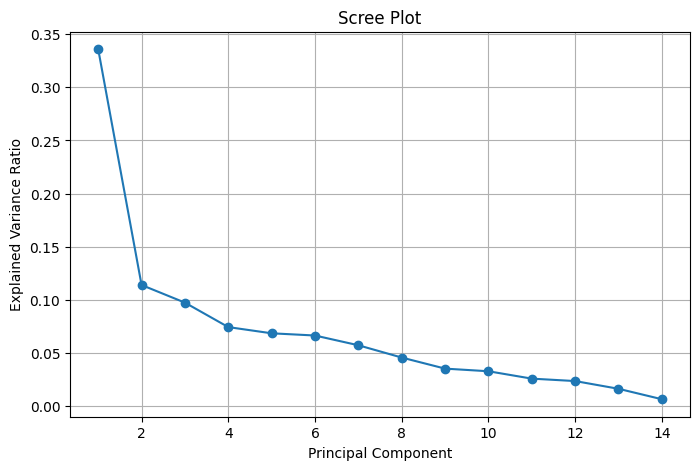

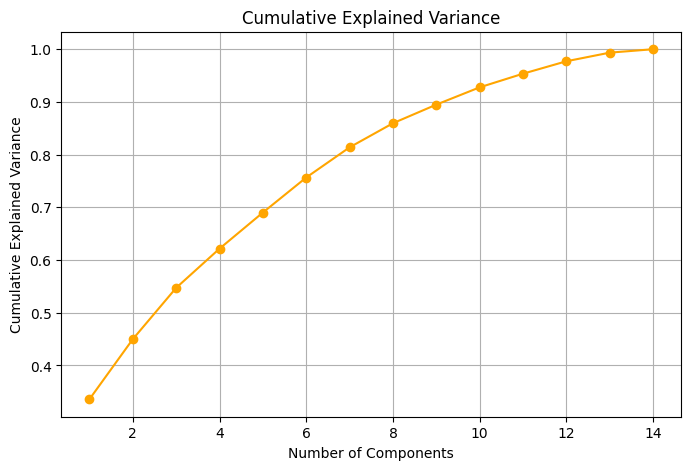

Cumulative variance explained by each additional principal component:
  PC1: 0.3358
  PC2: 0.4498
  PC3: 0.5472
  PC4: 0.6216
  PC5: 0.6901
  PC6: 0.7566
  PC7: 0.8138
  PC8: 0.8596
  PC9: 0.8949
  PC10: 0.9277
  PC11: 0.9536
  PC12: 0.9772
  PC13: 0.9935
  PC14: 1.0000


In [6]:
# --- STEP 1: Select appropriate columns for PCA ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in purchased_goods.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(purchased_goods[col])
    and col != "Scope_3_emissions_amount"
]
X = purchased_goods[numeric_cols].copy()

# --- STEP 2: Apply sign-log transformation ---
def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)

# --- STEP 3: Drop rows with missing values (keep track of indices) ---
X_dropped = X_transformed.dropna()
pca_indices = X_dropped.index

# --- STEP 4: Standardize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dropped)

# --- STEP 5: Fit PCA ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- STEP 6: Create a DataFrame for PCs, index matches original ---
num_pcs = X_pca.shape[1]
pc_columns = [f"PC{i+1}" for i in range(num_pcs)]
pcs_df = pd.DataFrame(X_pca, columns=pc_columns, index=pca_indices)

# --- STEP 7: Append PCs back to the original DataFrame (only for valid rows) ---
purchased_goods_with_pcs = purchased_goods.copy()
for col in pc_columns:
    purchased_goods_with_pcs[col] = np.nan  # initialize with NaN

purchased_goods_with_pcs.loc[pcs_df.index, pc_columns] = pcs_df

# --- Plots ---
explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_var_ratio) + 1),
    np.cumsum(explained_var_ratio),
    marker='o',
    color='orange'
)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# --- Print cumulative variance explained for each PC ---
cumulative_var = np.cumsum(explained_var_ratio)
print("Cumulative variance explained by each additional principal component:")
for i, var in enumerate(cumulative_var, start=1):
    print(f"  PC{i}: {var:.4f}")

# --- END ---
# purchased_goods_with_pcs now contains the principal components for valid rows.

Ten pc's explains >90% of the variance in the data, while 4 pc's is at the bottom of the "elbow" with much less significant return for each increase in number of pc's.<br>
I'll investigate both 10 pc's and 4 pc's performance on HLM models.

### PCA and Data Splitting — Purchased Goods Dataset

- Selects all relevant numeric features (excluding ID and categorical columns) and applies a signed log transform.
- Drops rows with missing values for PCA input.
- Computes 10-component and 4-component PCA, appending scores back to the original DataFrame.
- Transforms the target variable using the signed log.
- Splits the dataset into train (2018–2022) and test (2023) sets, restricting both to companies present in the test year.

_Result:_  
`train_df` and `test_df` are ready for modeling, with appended principal components and transformed features.

In [7]:
# --- Prepare Data ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in purchased_goods.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(purchased_goods[col])
    and col != "Scope_3_emissions_amount"
]
X = purchased_goods[numeric_cols].copy()

def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)
pca_data = X_transformed.dropna().copy()
pca_data["account_id"] = purchased_goods.loc[pca_data.index, "account_id"]
pca_data["Year"] = purchased_goods.loc[pca_data.index, "Year"]

X_pca_input = pca_data.drop(columns=["account_id", "Year"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# --- PCA for 10 components ---
pca10 = PCA(n_components=10)
pcs10 = pca10.fit_transform(X_scaled)
pcs10_df = pd.DataFrame(pcs10, columns=[f"PC10_{i+1}" for i in range(10)], index=pca_data.index)

# --- PCA for 4 components ---
pca4 = PCA(n_components=4)
pcs4 = pca4.fit_transform(X_scaled)
pcs4_df = pd.DataFrame(pcs4, columns=[f"PC4_{i+1}" for i in range(4)], index=pca_data.index)

# --- Merge all PC features to original DataFrame ---
purchased_goods_pca = purchased_goods.copy()
purchased_goods_pca = purchased_goods_pca.join(pcs10_df)
purchased_goods_pca = purchased_goods_pca.join(pcs4_df)

# --- Add transformed target and optionally other features ---
purchased_goods_pca['slog_Scope_3_emissions_amount'] = sign_log_transform(purchased_goods_pca['Scope_3_emissions_amount'])

# Optional: Rename columns for consistency
purchased_goods_pca = purchased_goods_pca.rename(columns={'incorporated_country': 'Countries',
                                                 'Primary activity': 'Primary_activity',
                                                 'Primary sector': 'Primary_sector'})

# -------------------------------
# --- Data Splitting Section  ---
# -------------------------------

# Only use rows where PCs have been computed (i.e., valid for PCA)
purchased_goods_pca_valid = purchased_goods_pca.loc[pca_data.index].copy()

# Split by year and account_id presence in both train and test
train_mask = (purchased_goods_pca_valid['Year'] >= 2018) & (purchased_goods_pca_valid['Year'] <= 2022)
test_mask  = (purchased_goods_pca_valid['Year'] == 2023)
test_accounts = set(purchased_goods_pca_valid.loc[test_mask, 'account_id'])
train_mask = train_mask & (purchased_goods_pca_valid['account_id'].isin(test_accounts))

train_df = purchased_goods_pca_valid[train_mask].copy()
test_df  = purchased_goods_pca_valid[test_mask].copy()

# Restrict test set to companies present in training set
valid_accounts = set(train_df['account_id'].unique())
test_df = test_df[test_df['account_id'].isin(valid_accounts)].copy()

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Now train_df and test_df are ready for downstream modeling

Train shape: (3162, 37)
Test shape: (724, 37)


In [8]:
purchased_goods_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5162 entries, 0 to 5161
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   5162 non-null   object 
 1   account_id                     5162 non-null   int64  
 2   Year                           5162 non-null   int64  
 3   Countries                      5162 non-null   object 
 4   Primary_activity               5162 non-null   object 
 5   Primary_sector                 5162 non-null   object 
 6   Market_Cap_USD                 4334 non-null   float64
 7   Revenue_USD                    4356 non-null   float64
 8   ebitda_USD                     4356 non-null   float64
 9   grossProfit_USD                4356 non-null   float64
 10  netIncome_USD                  4356 non-null   float64
 11  cashAndCashEquivalents_USD     4356 non-null   float64
 12  shortTermInvestments_USD       4356 non-null   f

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3162 entries, 0 to 4177
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   3162 non-null   object 
 1   account_id                     3162 non-null   int64  
 2   Year                           3162 non-null   int64  
 3   Countries                      3162 non-null   object 
 4   Primary_activity               3162 non-null   object 
 5   Primary_sector                 3162 non-null   object 
 6   Market_Cap_USD                 3162 non-null   float64
 7   Revenue_USD                    3162 non-null   float64
 8   ebitda_USD                     3162 non-null   float64
 9   grossProfit_USD                3162 non-null   float64
 10  netIncome_USD                  3162 non-null   float64
 11  cashAndCashEquivalents_USD     3162 non-null   float64
 12  shortTermInvestments_USD       3162 non-null   float6

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 4181 to 5159
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   724 non-null    object 
 1   account_id                     724 non-null    int64  
 2   Year                           724 non-null    int64  
 3   Countries                      724 non-null    object 
 4   Primary_activity               724 non-null    object 
 5   Primary_sector                 724 non-null    object 
 6   Market_Cap_USD                 724 non-null    float64
 7   Revenue_USD                    724 non-null    float64
 8   ebitda_USD                     724 non-null    float64
 9   grossProfit_USD                724 non-null    float64
 10  netIncome_USD                  724 non-null    float64
 11  cashAndCashEquivalents_USD     724 non-null    float64
 12  shortTermInvestments_USD       724 non-null    floa

### HLM with 10 Principal Components (PC10) — Purchased Goods Dataset

- Uses the `train_df` and `test_df` splits created from PCA-valid rows.
- Filters for required features, ensuring all categorical levels in test are present in train.
- Fits a hierarchical linear mixed model (HLM) using PC10 features, country, activity, and year, grouping by company.
- Reports regression metrics, feature importances, and visualizations for both log-transformed and original emissions.

_Result:_  
Enables robust, interpretable modeling of Scope 3 emissions using multivariate principal components and mixed effects.

                                          Mixed Linear Model Regression Results
Model:                            MixedLM                Dependent Variable:                slog_Scope_3_emissions_amount
No. Observations:                 3162                   Method:                            ML                           
No. Groups:                       724                    Scale:                             0.9263                       
Min. group size:                  1                      Log-Likelihood:                    -5228.8397                   
Max. group size:                  5                      Converged:                         Yes                          
Mean group size:                  4.4                                                                                    
-------------------------------------------------------------------------------------------------------------------------
                                                                  

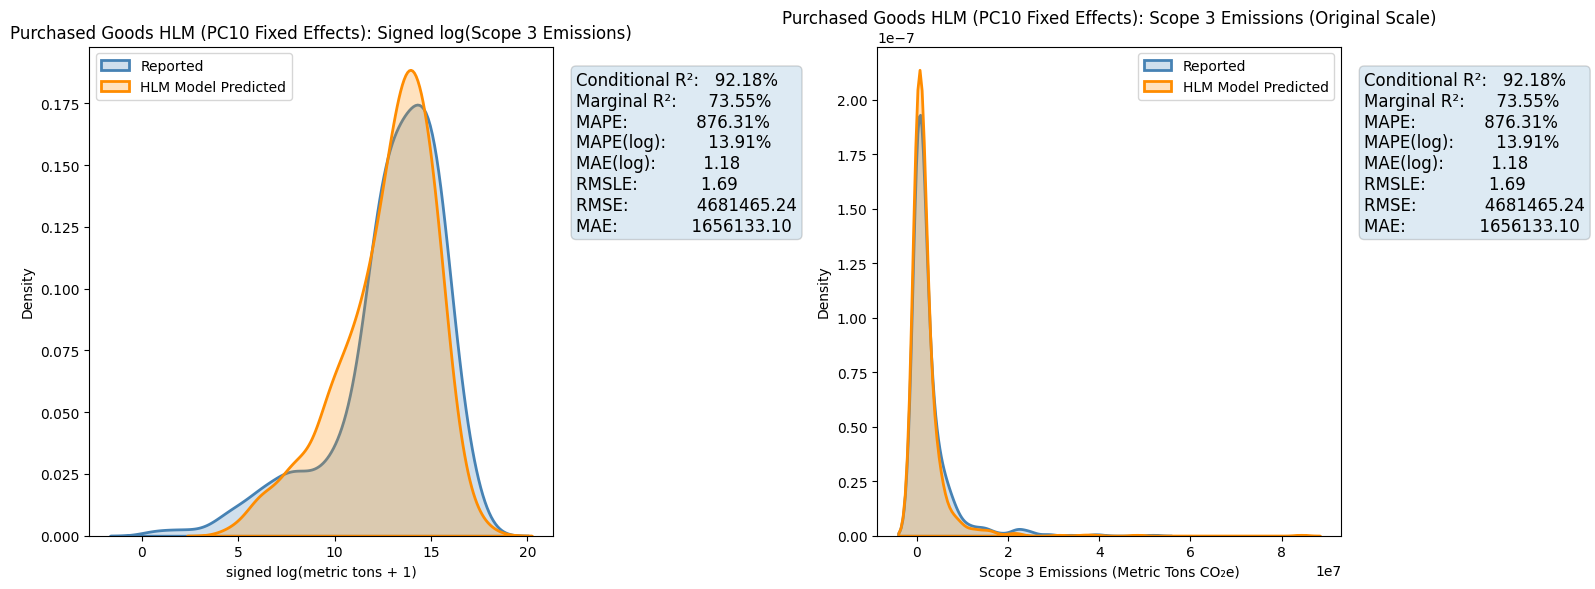

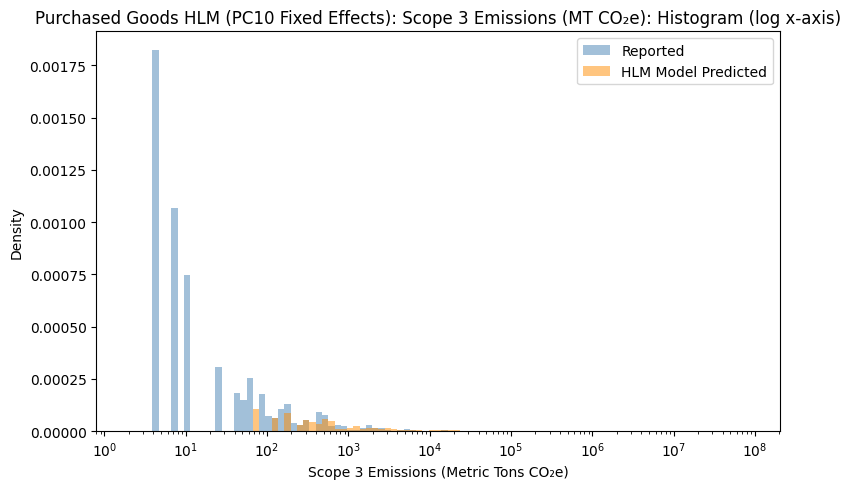

In [11]:
# --- 1. Use newly created train_df and test_df for modeling (no need to resplit) ---
# Assumes train_df and test_df exist from previous preprocessing and splitting steps

feature_cols_PC10 = [f'PC10_{i+1}' for i in range(10)]  # only PC10 features
target_col_PC10 = 'slog_Scope_3_emissions_amount'
cat_cols_PC10 = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars_PC10 = feature_cols_PC10 + [target_col_PC10] + cat_cols_PC10
train_df_PC10 = train_df.dropna(subset=all_model_vars_PC10).copy()
test_df_PC10 = test_df.dropna(subset=all_model_vars_PC10).copy()

# --- 2. Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC10[cat_col].unique())
    n_before = len(test_df_PC10)
    test_df_PC10 = test_df_PC10[test_df_PC10[cat_col].isin(train_cats)]
    n_after = len(test_df_PC10)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_PC10.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- 3. Model formula (only PC10 features as predictors) ---
    fixed_effects = (
        ' + '.join(feature_cols_PC10) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_PC10} ~ {fixed_effects}'

    # --- 4. Fit the mixed-effects model ---
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC10, groups=train_df_PC10['account_id'])
        mdf_PC10 = md.fit(reml=False)
    print(mdf_PC10.summary())

    # --- 5. CALCULATE CONDITIONAL AND MARGINAL R² ---
    var_fixed = np.var(mdf_PC10.fittedvalues)
    var_resid = mdf_PC10.scale
    var_random = mdf_PC10.cov_re.iloc[0, 0] if mdf_PC10.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- 6. Predict on test set ---
    test_df_PC10['predicted_log'] = mdf_PC10.predict(test_df_PC10)
    test_df_PC10['predicted'] = np.sign(test_df_PC10['predicted_log']) * (np.expm1(np.abs(test_df_PC10['predicted_log'])))

    # --- 7. Metrics ---
    y_true_log = test_df_PC10[target_col_PC10]
    y_pred_log = test_df_PC10['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC10['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nPurchased Goods HLM with PC10 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- 8. Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_PC10.params,
        'pvalue': mdf_PC10.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- 9. Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Purchased Goods HLM (PC10 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Purchased Goods HLM (PC10 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    valid_hist_mask = np.isfinite(y_true) & np.isfinite(y_pred) & (y_true > -1) & (y_pred > -1)
    y_true_hist = y_true[valid_hist_mask]
    y_pred_hist = y_pred[valid_hist_mask]
    if len(y_true_hist) > 0 and len(y_pred_hist) > 0:
        min_val = min(y_true_hist.min(), y_pred_hist.min())
        max_val = max(y_true_hist.max(), y_pred_hist.max())
        if (min_val + 1) > 0 and (max_val + 1) > 0:
            log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
            plt.figure(figsize=(8, 5))
            sns.histplot(y_true_hist, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
            sns.histplot(y_pred_hist, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
            plt.xscale("log")
            plt.title("Purchased Goods HLM (PC10 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
            plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
            plt.ylabel("Density")
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            print("Error: min_val or max_val invalid for log scaling.")
    else:
        print("Error: No valid y_true/y_pred values for histogram.")

    # --- 10. RETURN METRICS FOR SUMMARY TABLE ---
    PC10_model_metrics = {
        "Model": "HLM PC10",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC10),
        "# Obs (test)": len(test_df_PC10),
        "# Obs (train/test)": f"{len(train_df_PC10)}/{len(test_df_PC10)}"
    }

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3162 entries, 0 to 4177
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   3162 non-null   object 
 1   account_id                     3162 non-null   int64  
 2   Year                           3162 non-null   int64  
 3   Countries                      3162 non-null   object 
 4   Primary_activity               3162 non-null   object 
 5   Primary_sector                 3162 non-null   object 
 6   Market_Cap_USD                 3162 non-null   float64
 7   Revenue_USD                    3162 non-null   float64
 8   ebitda_USD                     3162 non-null   float64
 9   grossProfit_USD                3162 non-null   float64
 10  netIncome_USD                  3162 non-null   float64
 11  cashAndCashEquivalents_USD     3162 non-null   float64
 12  shortTermInvestments_USD       3162 non-null   float6

### HLM with 4 Principal Components (PC4) — Purchased Goods Dataset

- Uses the `train_df` and `test_df` splits created from PCA-valid rows, not a new split.
- Filters for required features and ensures all categorical levels in the test set are present in the train set.
- Fits a hierarchical linear mixed model (HLM) using the 4 PC features, country, activity, and year, with company as the grouping variable.
- Provides regression metrics, feature importances, and visualizations for both the log-transformed and original emissions.

_Result:_  
Enables interpretable mixed-effects modeling of Scope 3 emissions from purchased goods using principal components and contextual covariates.

                                          Mixed Linear Model Regression Results
Model:                            MixedLM                Dependent Variable:                slog_Scope_3_emissions_amount
No. Observations:                 3162                   Method:                            ML                           
No. Groups:                       724                    Scale:                             0.9270                       
Min. group size:                  1                      Log-Likelihood:                    -5248.8969                   
Max. group size:                  5                      Converged:                         Yes                          
Mean group size:                  4.4                                                                                    
-------------------------------------------------------------------------------------------------------------------------
                                                                  

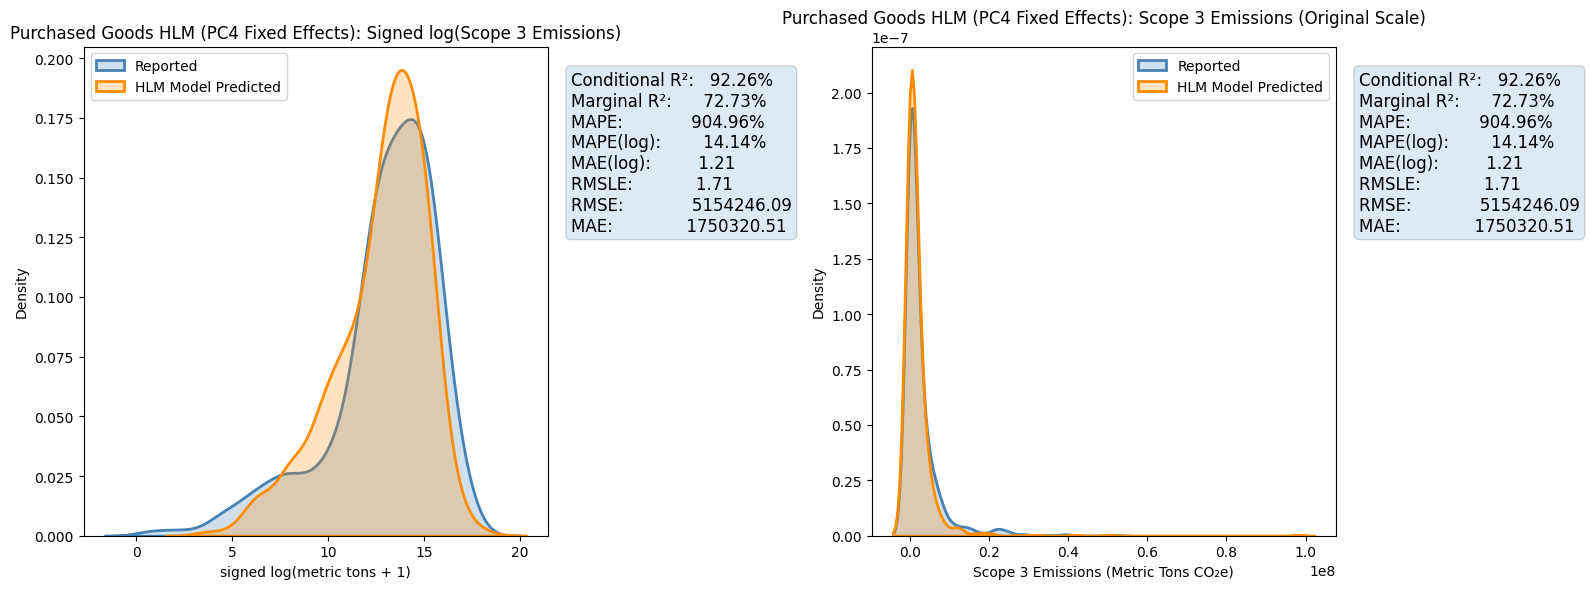

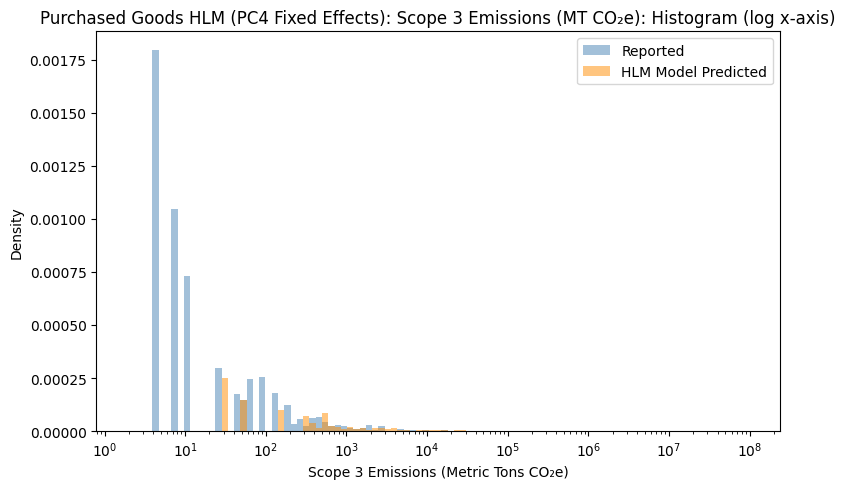

In [13]:
# --- 1. Use newly created train_df and test_df for modeling (no need to resplit) ---
# Assumes train_df and test_df exist from previous preprocessing and splitting steps

feature_cols_pc4 = [f'PC4_{i}' for i in range(1, 5)]
target_col_pc4 = 'slog_Scope_3_emissions_amount'
cat_cols_pc4 = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars_pc4 = feature_cols_pc4 + [target_col_pc4] + cat_cols_pc4
train_df_pc4 = train_df.dropna(subset=all_model_vars_pc4).copy()
test_df_pc4 = test_df.dropna(subset=all_model_vars_pc4).copy()

# --- 2. Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_pc4[cat_col].unique())
    n_before = len(test_df_pc4)
    test_df_pc4 = test_df_pc4[test_df_pc4[cat_col].isin(train_cats)]
    n_after = len(test_df_pc4)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_pc4.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- 3. Model formula ---
    fixed_effects = (
        ' + '.join(feature_cols_pc4) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_pc4} ~ {fixed_effects}'

    # --- 4. Fit the mixed-effects model ---
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_pc4, groups=train_df_pc4['account_id'])
        mdf_pc4 = md.fit(reml=False)
    print(mdf_pc4.summary())

    # --- 5. CALCULATE CONDITIONAL AND MARGINAL R² ---
    var_fixed = np.var(mdf_pc4.fittedvalues)
    var_resid = mdf_pc4.scale
    var_random = mdf_pc4.cov_re.iloc[0, 0] if mdf_pc4.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- 6. Predict on test set ---
    test_df_pc4['predicted_log'] = mdf_pc4.predict(test_df_pc4)
    test_df_pc4['predicted'] = np.sign(test_df_pc4['predicted_log']) * (np.expm1(np.abs(test_df_pc4['predicted_log'])))

    # --- 7. Metrics ---
    y_true_log = test_df_pc4[target_col_pc4]
    y_pred_log = test_df_pc4['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_pc4['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nPurchased Goods HLM with PC4 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- 8. Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_pc4.params,
        'pvalue': mdf_pc4.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- 9. Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Purchased Goods HLM (PC4 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Purchased Goods HLM (PC4 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    valid_hist_mask = np.isfinite(y_true) & np.isfinite(y_pred) & (y_true > -1) & (y_pred > -1)
    y_true_hist = y_true[valid_hist_mask]
    y_pred_hist = y_pred[valid_hist_mask]
    if len(y_true_hist) > 0 and len(y_pred_hist) > 0:
        min_val = min(y_true_hist.min(), y_pred_hist.min())
        max_val = max(y_true_hist.max(), y_pred_hist.max())
        if (min_val + 1) > 0 and (max_val + 1) > 0:
            log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
            plt.figure(figsize=(8, 5))
            sns.histplot(y_true_hist, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
            sns.histplot(y_pred_hist, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
            plt.xscale("log")
            plt.title("Purchased Goods HLM (PC4 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
            plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
            plt.ylabel("Density")
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            print("Error: min_val or max_val invalid for log scaling.")
    else:
        print("Error: No valid y_true/y_pred values for histogram.")

    # --- 10. RETURN METRICS FOR SUMMARY TABLE ---
    pc4_model_metrics = {
        "Model": "HLM PC4",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_pc4),
        "# Obs (test)": len(test_df_pc4),
        "# Obs (train/test)": f"{len(train_df_pc4)}/{len(test_df_pc4)}"
    }

Now I'll look into hierarchical clustering to determine if that may add value to increasing prediction accuracy.

In [14]:
purchased_goods_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5162 entries, 0 to 5161
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   5162 non-null   object 
 1   account_id                     5162 non-null   int64  
 2   Year                           5162 non-null   int64  
 3   Countries                      5162 non-null   object 
 4   Primary_activity               5162 non-null   object 
 5   Primary_sector                 5162 non-null   object 
 6   Market_Cap_USD                 4334 non-null   float64
 7   Revenue_USD                    4356 non-null   float64
 8   ebitda_USD                     4356 non-null   float64
 9   grossProfit_USD                4356 non-null   float64
 10  netIncome_USD                  4356 non-null   float64
 11  cashAndCashEquivalents_USD     4356 non-null   float64
 12  shortTermInvestments_USD       4356 non-null   f

### Hierarchical Clustering on PCA Features — Purchased Goods Dataset

- Selects the 4 principal components (PC4) as features for clustering.
- Standardizes the PC4 features.
- Performs hierarchical clustering (Ward linkage).
- Determines the optimal number of clusters using silhouette scores (tests 2–30 clusters).
- Assigns optimal cluster labels to each row, adds as a `Cluster` column in the dataset.
- Reports cluster counts and visualizes silhouette scores and dendrogram for interpretability.

_Result:_  
The `purchased_goods_pca_clusters` DataFrame includes a `Cluster` label for each row valid for PC4-based clustering, supporting downstream analysis or modeling by cluster group.

Optimal number of clusters (highest silhouette score): 3


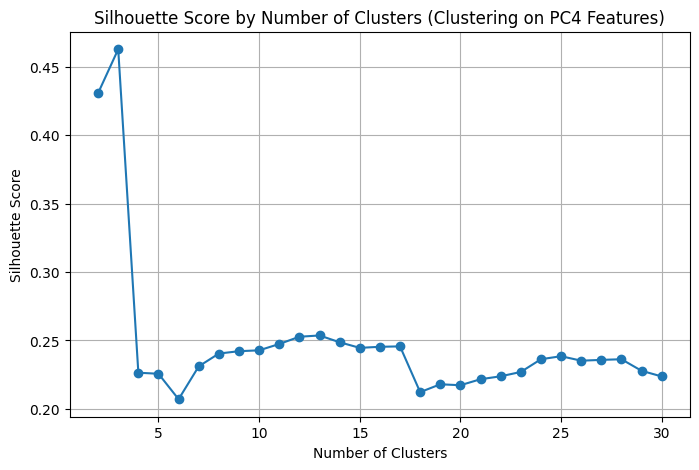

Number of observations in each cluster:
3    3796
1     356
2     126
Name: count, dtype: int64


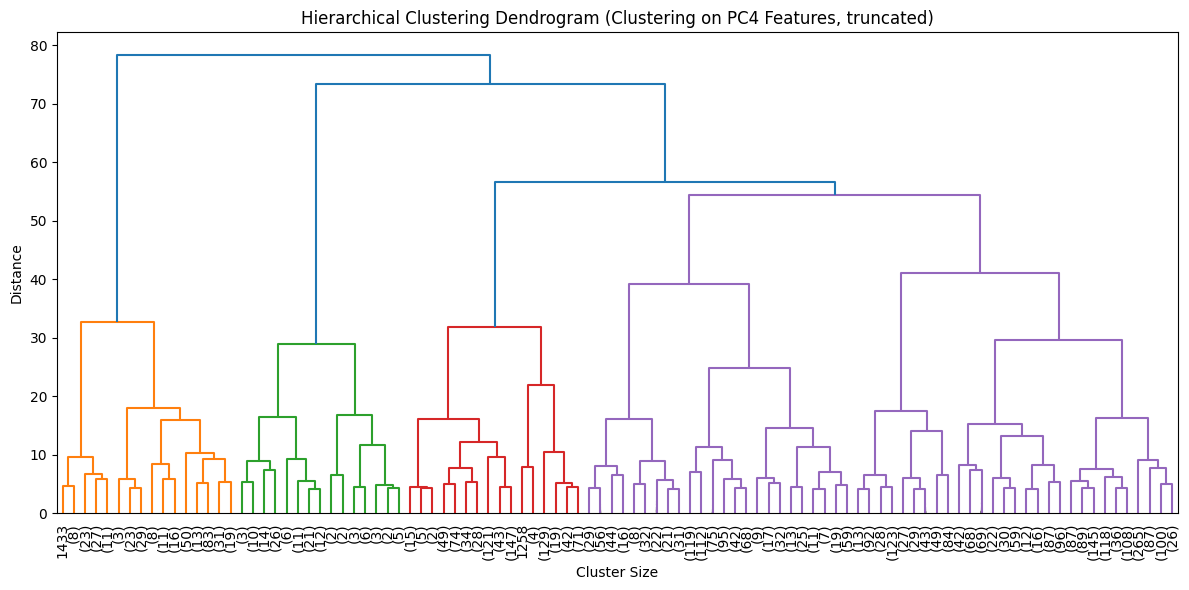

Training set clusters: Cluster
3.0    2801
1.0     276
2.0      85
Name: count, dtype: int64
Test set clusters: Cluster
3.0    656
1.0     41
2.0     27
Name: count, dtype: int64


In [16]:
# --- STEP 1: Select PC4 PCA components for clustering ---
pc4_cols = [f'PC4_{i}' for i in range(1, 5)]
X_pc4 = purchased_goods_pca[pc4_cols].dropna()
clust_indices = X_pc4.index

# --- STEP 2: Standardize the PC4 data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pc4)

# --- STEP 3: Hierarchical clustering (Ward linkage) ---
Z = linkage(X_scaled, method='ward')

# --- STEP 4: Find optimal number of clusters using silhouette score ---
range_n_clusters = range(2, 31)  # 2 to 30 clusters
sil_scores = []

for n_clusters in range_n_clusters:
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

optimal_n_clusters = range_n_clusters[np.argmax(sil_scores)]
print(f"Optimal number of clusters (highest silhouette score): {optimal_n_clusters}")

# --- Plot silhouette scores ---
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score by Number of Clusters (Clustering on PC4 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# --- STEP 5: Assign optimal cluster labels ---
labels_optimal = fcluster(Z, optimal_n_clusters, criterion='maxclust')

# --- STEP 6: Append cluster labels back to original DataFrame (only for valid rows) ---
purchased_goods_pca_clusters = purchased_goods_pca.copy()
purchased_goods_pca_clusters['Cluster'] = np.nan  # initialize with NaN
purchased_goods_pca_clusters.loc[clust_indices, 'Cluster'] = labels_optimal

# --- Print cluster counts ---
print("Number of observations in each cluster:")
print(pd.Series(labels_optimal).value_counts())

# --- Optionally plot dendrogram (subset for readability) ---
plt.figure(figsize=(12, 6))
sample_size = min(100, len(X_scaled))  # Plot up to 100 samples for clarity
dendrogram(Z, truncate_mode='lastp', p=sample_size, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Clustering on PC4 Features, truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# --- STEP 7: Append Cluster feature to train_df and test_df for future modeling ---
# Assumes train_df and test_df have the same indices as purchased_goods_pca_clusters for valid rows

if 'Cluster' not in train_df.columns:
    train_df['Cluster'] = purchased_goods_pca_clusters.loc[train_df.index, 'Cluster']
if 'Cluster' not in test_df.columns:
    test_df['Cluster'] = purchased_goods_pca_clusters.loc[test_df.index, 'Cluster']

print("Training set clusters:", train_df['Cluster'].value_counts(dropna=False))
print("Test set clusters:", test_df['Cluster'].value_counts(dropna=False))

In [18]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3162 entries, 0 to 4177
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   3162 non-null   object 
 1   account_id                     3162 non-null   int64  
 2   Year                           3162 non-null   int64  
 3   Countries                      3162 non-null   object 
 4   Primary_activity               3162 non-null   object 
 5   Primary_sector                 3162 non-null   object 
 6   Market_Cap_USD                 3162 non-null   float64
 7   Revenue_USD                    3162 non-null   float64
 8   ebitda_USD                     3162 non-null   float64
 9   grossProfit_USD                3162 non-null   float64
 10  netIncome_USD                  3162 non-null   float64
 11  cashAndCashEquivalents_USD     3162 non-null   float64
 12  shortTermInvestments_USD       3162 non-null   float6

### HLM with 4 Principal Components (PC4) and Cluster — Purchased Goods Dataset

- Uses the `purchased_goods_pca_clusters` dataset, which contains all original columns plus PC4 and `Cluster` assignments.
- Splits the data into train (2018–2022) and test (2023) sets, restricted to companies present in both.
- Filters for rows with valid PC4 and Cluster information, keeping all other original columns for analysis.
- Ensures all categorical levels in the test set are present in the training set, including `Cluster`.
- Fits a hierarchical linear mixed model (HLM) using PC4 features, `Cluster`, country, activity, and year as fixed effects, grouping by company.
- Reports regression metrics, feature importances, and visualizations for both log-transformed and original emissions.

_Result:_  
Enables robust mixed-effects modeling of Scope 3 emissions from purchased goods using principal components, cluster assignments, and full contextual data.

                                          Mixed Linear Model Regression Results
Model:                            MixedLM                Dependent Variable:                slog_Scope_3_emissions_amount
No. Observations:                 3162                   Method:                            ML                           
No. Groups:                       724                    Scale:                             0.9270                       
Min. group size:                  1                      Log-Likelihood:                    -5248.8807                   
Max. group size:                  5                      Converged:                         Yes                          
Mean group size:                  4.4                                                                                    
-------------------------------------------------------------------------------------------------------------------------
                                                                  

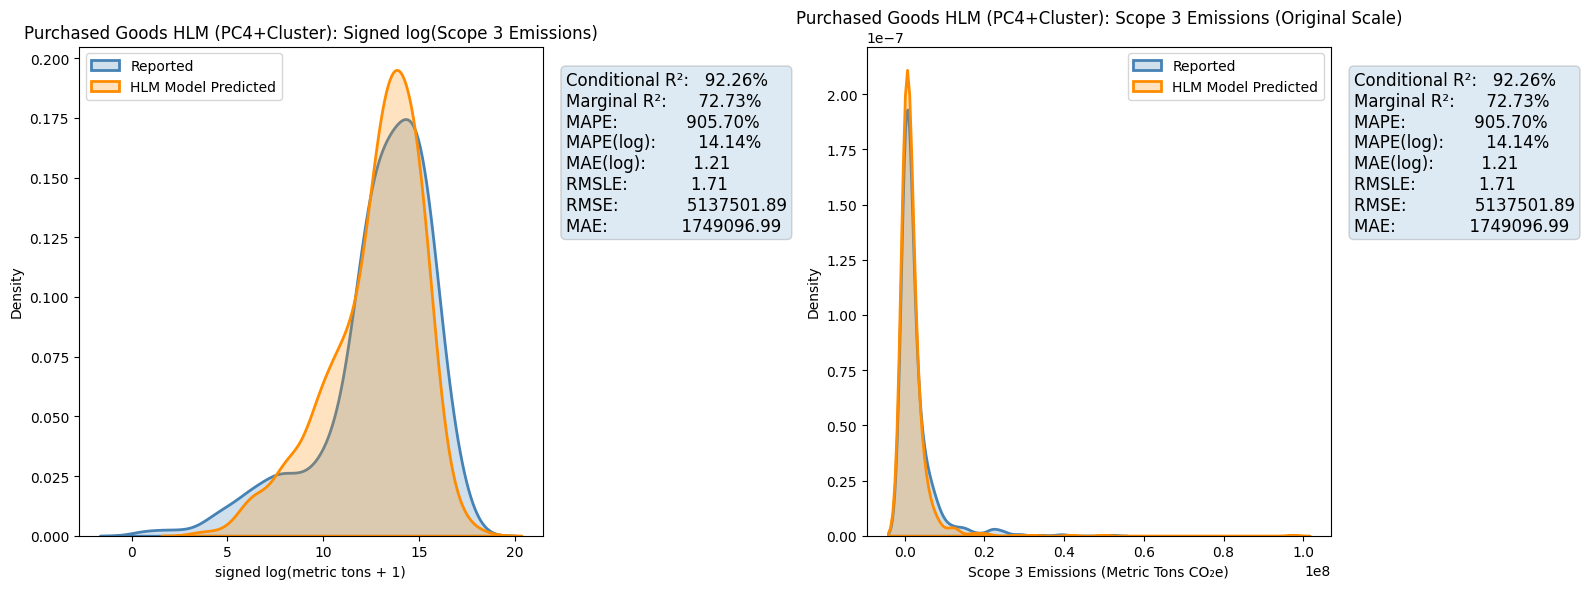

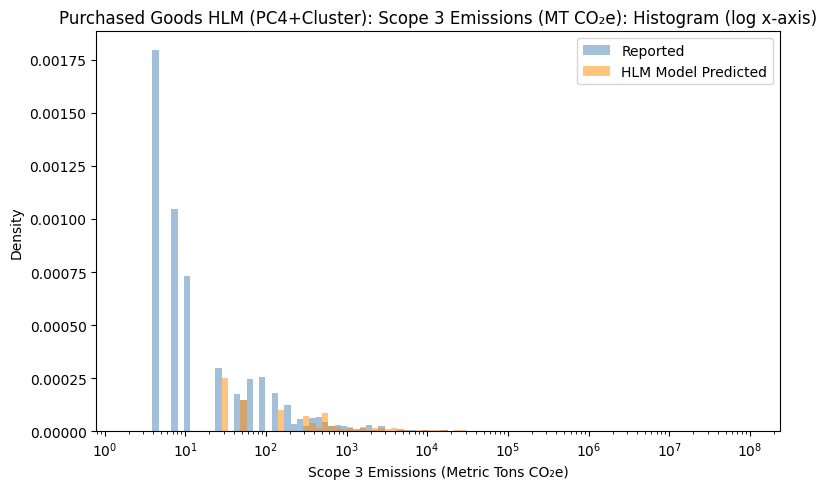

In [19]:
# --- PC4 + Cluster HLM with train_df and test_df ---

# Assume train_df and test_df already have all PC features, 'Cluster', and slog target
feature_cols_pc4_cluster = [f'PC4_{i}' for i in range(1, 5)] + ['Cluster']
target_col = 'slog_Scope_3_emissions_amount'
cat_cols = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars = feature_cols_pc4_cluster + [target_col] + cat_cols

# --- 1. Filter for required variables and drop missing ---
train_df_pc4c = train_df.dropna(subset=all_model_vars).copy()
test_df_pc4c  = test_df.dropna(subset=all_model_vars).copy()

# --- 2. Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity', 'Cluster']:
    train_cats = set(train_df_pc4c[cat_col].unique())
    n_before = len(test_df_pc4c)
    test_df_pc4c = test_df_pc4c[test_df_pc4c[cat_col].isin(train_cats)]
    n_after = len(test_df_pc4c)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_pc4c.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- 3. Model formula ---
    fixed_effects = (
        ' + '.join([f'C({col})' if col == 'Cluster' else col for col in feature_cols_pc4_cluster]) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col} ~ {fixed_effects}'

    # --- 4. Fit the mixed-effects model ---
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_pc4c, groups=train_df_pc4c['account_id'])
        mdf_pc4c = md.fit(reml=False)
    print(mdf_pc4c.summary())

    # --- 5. Calculate Conditional and Marginal R² ---
    var_fixed = np.var(mdf_pc4c.fittedvalues)
    var_resid = mdf_pc4c.scale
    var_random = mdf_pc4c.cov_re.iloc[0, 0] if mdf_pc4c.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- 6. Predict on test set ---
    test_df_pc4c['predicted_log'] = mdf_pc4c.predict(test_df_pc4c)
    test_df_pc4c['predicted'] = np.sign(test_df_pc4c['predicted_log']) * (np.expm1(np.abs(test_df_pc4c['predicted_log'])))

    # --- 7. Metrics ---
    y_true_log = test_df_pc4c[target_col]
    y_pred_log = test_df_pc4c['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_pc4c['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nPurchased Goods HLM with PC4+Cluster Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- 8. Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_pc4c.params,
        'pvalue': mdf_pc4c.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- 9. Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Purchased Goods HLM (PC4+Cluster): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Purchased Goods HLM (PC4+Cluster): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("Purchased Goods HLM (PC4+Cluster): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 10. RETURN METRICS FOR SUMMARY TABLE ---
    pc4_cluster_model_metrics = {
        "Model": "HLM PC4+Cluster",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_pc4c),
        "# Obs (test)": len(test_df_pc4c),
        "# Obs (train/test)": f"{len(train_df_pc4c)}/{len(test_df_pc4c)}"
    }

### Model Metrics Summary: Purchased Goods HLM Models

In [20]:
# Collect metrics dicts from each model; change names as needed
metrics_dicts = [
    PC10_model_metrics,        # e.g., "HLM PC10"
    pc4_model_metrics,         # e.g., "HLM PC4"
    pc4_cluster_model_metrics  # e.g., "HLM PC4 + Cluster"
]

# Attach observation counts, convergence info, and explained variance to each dictionary
for metrics, train, test, model, explained_var in zip(
        metrics_dicts,
        [train_df_PC10, train_df_pc4, train_df_pc4c],
        [test_df_PC10, test_df_pc4, test_df_pc4c],
        [mdf_PC10, mdf_pc4, mdf_pc4c],   # model objects (add these to your workspace)
        [
            sum(pca10.explained_variance_ratio_),    # PC10 explained variance
            sum(pca4.explained_variance_ratio_),     # PC4 explained variance
            sum(pca4.explained_variance_ratio_)      # PC4 (cluster uses same PC4)
        ]):
    metrics["# Obs (train)"] = len(train)
    metrics["# Obs (test)"] = len(test)
    metrics["# Obs (train/test)"] = f"{len(train)}/{len(test)}"
    metrics["Converged"] = bool(getattr(model, "converged", False))
    metrics["PC Explained Variance"] = explained_var

# Add a new row for your "Optimized" model
optimized_row = {
    "Model": "Optimized Purchased Goods and Services HLM",
    "Conditional_R2": 0.9233,
    "Marginal_R2": 0.7235,
    "RMSE": 4517116.25,
    "MAE": 1668196.42,
    "MAE_log": 1.18,
    "RMSLE": 1.67,
    "MAPE": 787.76,
    "# Obs (train/test)": "3483/724",
    "PC Explained Variance": np.nan,
    "Converged": True
}
metrics_dicts.append(optimized_row)

metrics_df = pd.DataFrame(metrics_dicts)

# Order columns for summary with variance before Converged
desired_order = [
    "Model", "PC Explained Variance", "Conditional_R2", "Marginal_R2", "RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "# Obs (train/test)", "Converged"
]

# Add MAE_log if missing
if "MAE_log" not in metrics_df.columns:
    metrics_df["MAE_log"] = np.nan

metrics_df = metrics_df[[col for col in desired_order if col in metrics_df.columns]]

# Format for display
metrics_df_display = metrics_df.copy()
if "Conditional_R2" in metrics_df_display.columns:
    metrics_df_display["Conditional_R2"] = (metrics_df_display["Conditional_R2"].astype(float) * 100).map("{:.2f}%".format)
if "Marginal_R2" in metrics_df_display.columns:
    metrics_df_display["Marginal_R2"] = (metrics_df_display["Marginal_R2"].astype(float) * 100).map("{:.2f}%".format)
for col in ["RMSE", "MAE", "MAE_log", "RMSLE", "MAPE"]:
    if col in metrics_df_display.columns:
        metrics_df_display[col] = metrics_df_display[col].astype(float).map("{:.2f}".format)
if "PC Explained Variance" in metrics_df_display.columns:
    metrics_df_display["PC Explained Variance"] = metrics_df_display["PC Explained Variance"].apply(
        lambda v: "{:.2%}".format(v) if pd.notnull(v) else ""
    )
if "Converged" in metrics_df_display.columns:
    metrics_df_display["Converged"] = metrics_df_display["Converged"].map({True: "Yes", False: "No", np.nan: ""})

# Display in notebook or print
try:
    display(metrics_df_display)
except Exception:
    print(metrics_df_display.to_string(index=False))

,Model,PC Explained Variance,Conditional_R2,Marginal_R2,RMSE,MAE,MAE_log,RMSLE,MAPE,# Obs (train/test),Converged
0,HLM PC10,92.77%,92.18%,73.55%,4681465.24,1656133.10,1.18,1.69,876.31,3162/724,Yes
1,HLM PC4,62.16%,92.26%,72.73%,5154246.09,1750320.51,1.21,1.71,904.96,3162/724,Yes
2,HLM PC4+Cluster,62.16%,92.26%,72.73%,5137501.89,1749096.99,1.21,1.71,905.70,3162/724,Yes
3,Optimized Purchased Goods and Services HLM,,92.33%,72.35%,4517116.25,1668196.42,1.18,1.67,787.76,3483/724,Yes
